In [22]:
from brian2 import *
%matplotlib inline

In [23]:
# Constants
tau = 4*ms
I = 1.1/ms
gamma = 1/ms

# Non-dimensionalized constants
tp = tau/ms
curr = I*ms
g = gamma*ms
out = curr/g  #should be > the threshold of firing

# equation (1)
eqs = '''
dv/dt = I - gamma*v : 1
'''

# equation (2) 
eqs2 = '''
dv/dt = ((I/gamma) - v)/tau : 1
'''

In [24]:
start_scope()

inh = 0.001
exc = 0.001
# n = 9
n = 16
seed(21)


G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
groupinit = randint(0, 99, size=n)/100
G1.v = groupinit

# G1 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G2 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G3 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G4 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G5 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G6 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G7 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G8 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')
# G9 = NeuronGroup(n, eqs2, threshold='v>1', reset='v = 0', method='exact')

# groupinit = randint(0, 99, size=(9, n))/100

# [G1.v, G2.v, G3.v, G4.v, G5.v, G6.v, G7.v, G8.v, G9.v] = groupinit

In [25]:
sudo = G1.i[:].reshape(4,4)

In [26]:
sudo

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [28]:
sudo.reshape(2,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

Connect all in same row and same column

for i, j
for all x in 0,3 
	connect i,j and x,j
for all y in 0,3
	connect i,j and i,y

Connect rest all in the subgrid, only 1 remains in each subgrid
the one diagonally opposite (within the subgrid)

or, get subgrid for given point
and connect all in the subgrid

grid is (0,3)x(0,3)
subgrids are 
(0,1)x(0,1) (2,3)x(0,1)
(2,3)x(0,1) (2,3)x(2,3)

0 1
2 3
subgrids

In [128]:
subgrid = -1
subgrids = [[(0,0),(0,1),(1,0),(1,1)],
            [(0,2),(0,3),(1,2),(1,3)],
            [(2,0),(2,1),(3,0),(3,1)],
            [(2,2),(2,3),(3,2),(3,3)]]

def getsubgrid(i,j):
        if i<2:
                if j<2:
                        subgrid = 0
                if j>1 and j<4:
                        subgrid = 1
        elif i>1 and i<4:
                if j<2:
                        subgrid = 2
                if j>1 and j<4:
                        subgrid = 3
        return subgrids[subgrid]

def matcon(i,j):
        matrix[i, j] = 1

def connectrowcol(i,j):
        for y in range(4):
                if y == i:
                        pass;
                else:
                        matcon(sudo[i,j], sudo[y,j])
        for x in range(4):
                if x == j:
                        pass;
                else:
                        matcon(sudo[i,j], sudo[i,x])

def connectsub(i,j):
        for (x,y) in getsubgrid(i,j):
                if (x,y) != (i,j):
                        matcon(sudo[i,j], sudo[x,y])

def inhibconnect():
        for i in range(4):
                for j in range(4):
                        connectrowcol(i,j)
                        connectsub(i,j)

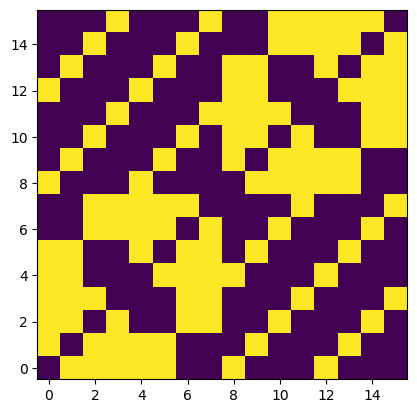

In [132]:
matrix = zeros((n, n))

inhibconnect()

imshow(matrix, origin='lower');

In [133]:
exc_matrix = 1 - matrix

si, ti = matrix.nonzero()
se, te = exc_matrix.nonzero()

In [134]:
# Inhibitory synapses
I1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post - inh)/curr)))/tp))')

# Excitatory synapses
E1 = Synapses(G1, G1, on_pre='v = out * (1-exp(-(tp * log(1/(1 - g*(v_post + exc)/curr)))/tp))')

I1.connect(i=si, j=ti)

E1.connect(i=se, j=te)

M1 = StateMonitor(G1, 'v', record=True)
Sp1 = SpikeMonitor(G1)

In [135]:
run(500*ms)

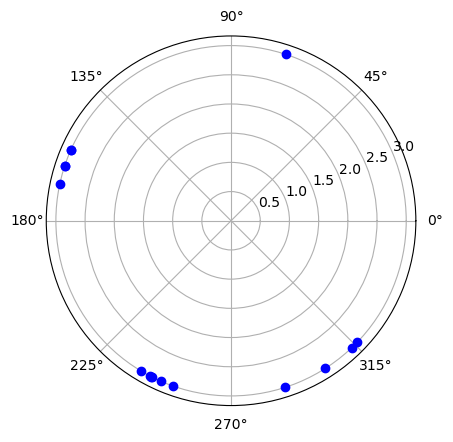

In [141]:
alph = 0.2
t = 4999

for x in range(n):
	polar(M1.v[x][t] * 2*pi, 3, 'bo')